In [1]:
import cv2
import gdal 
import ogr, osr
import numpy as np
import geopandas as gpd
import os
from shapely.geometry import Polygon

In [7]:
df_target = gpd.read_file("../data/Sentinel-2/farm/YL20181Rice.shp")
ds_pred = gdal.Open("./experiments/台灣區決賽所用模型及預測結果/prediction/pred_T50QRM_20180322T022651_B2348.tif")
df_target.head()

,段號,area,geometry
0,PC038000490000,2122.18,"POLYGON ((189992.5477 2630997.785499999, 18995..."
1,PC120600760000,2794.62,"POLYGON ((190993.6179 2632760.158, 191000.1947..."
2,PC120600810000,7303.55,"POLYGON ((191042.2021000003 2632757.6303, 1910..."
3,PC120600850000,1849.67,"POLYGON ((191195.3153999997 2632737.313999999,..."
4,PC038001850000,1801.43,"POLYGON ((190095.6320000002 2630820.126399999,..."


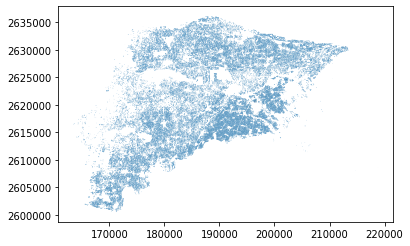

In [4]:
%matplotlib inline
df_target["geometry"].plot()

In [10]:
from rasterio.mask import mask
geoms = df_target.geometry.values
from shapely.geometry import mapping
geoms = [mapping(geoms[0])]
# extract the raster values values within the polygon 
with rasterio.open("./experiments/台灣區決賽所用模型及預測結果/prediction/pred_T50QRM_20180322T022651_B2348.tif") as src:
     out_image, out_transform = mask(src, geoms, crop=True)

array([<shapely.geometry.polygon.Polygon object at 0x0000010E35075390>,
       ...,
      dtype=object)